# Втор парцијален испит по Роботика 1

Датум: 04.06.2021

## Задача 2

**(35 поени)** Дадена е рамнинската роботска рака од сликата со конфигурација RRR. Нејзината задача е да ја фати фрлената топка. Раката поседува три краци со должини $l_1 = l_2 = l$ и $l_3 = 0$, соодветно, чии маси се $m_1 = m_2 = m_3 = m$, а нивните моменти на инерција се $I_1 = I_2 = I_3 = I$. Тежиштата на првиот и вториот крак се наоѓаат точно на половината од нивната должина, додека тежиштето на третиот крак се поклопува со третиот ротациски зглоб на раката. Топката е фатена во положбата А, која исто така се поклопува со третиот ротациски зглоб. Воочете дека аглите на ротација на зглобовите $\theta_1$ и $\theta_3$ се дефинирани апсолутно во однос на хоризонталата, додека аголот на ротација $\theta_2$ е дефиниран релативно во однос на правецот на првиот крак. Да се најде соодветниот динамички модел на оваа роботска рака под направените претпоставки.

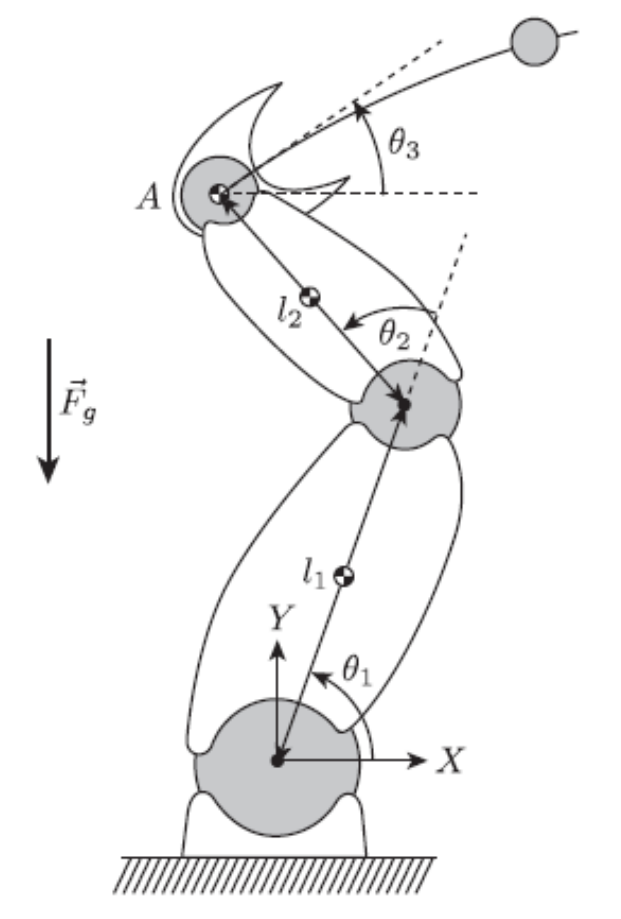

In [1]:
from IPython import display
display.Image('images/2.png', width=400)

## Решение

In [1]:
import sympy as sp
from sympy.physics import mechanics
import script as rt
from IPython import display
from IPython.lib.display import IFrame
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
t = sp.symbols('t')
mechanics.init_vprinting()  # за да скрати печатењето на (t) кај променливите кои зависат од времето

In [3]:
theta1, theta2, theta3, l = sp.symbols('theta1, theta2, theta3, l')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,0,l,0)
robot.add_revolute_joint(theta2,0,l,0)
robot.add_revolute_joint(theta3,0,0,0)
robot.add_subs([(l, 1)])
robot.interact()

In [6]:
robot.get_dh_matrix()

⎡cos(θ₁ + θ₂ + θ₃)  -sin(θ₁ + θ₂ + θ₃)  0  l⋅(cos(θ₁) + cos(θ₁ + θ₂))⎤
⎢                                                                    ⎥
⎢sin(θ₁ + θ₂ + θ₃)  cos(θ₁ + θ₂ + θ₃)   0  l⋅(sin(θ₁) + sin(θ₁ + θ₂))⎥
⎢                                                                    ⎥
⎢        0                  0           1              0             ⎥
⎢                                                                    ⎥
⎣        0                  0           0              1             ⎦

In [4]:
m, g, l, I = sp.symbols('m, g, l, I')
theta1, theta2, theta3= mechanics.dynamicsymbols('theta1, theta2, theta3')

In [24]:
x1 = (l/2)*sp.cos(theta1)
y1 = (l/2)*sp.sin(theta1)
v12= x1.diff(t)**2+y1.diff(t)**2
v12= v12.simplify()
v12

 2   2
l ⋅θ₁̇ 
──────
  4   

In [25]:
x2 = (l)*sp.cos(theta1)+(l/2)*sp.cos(theta1+theta2)
y2 = (l)*sp.sin(theta1)+(l/2)*sp.sin(theta1+theta2)
v22= x2.diff(t)**2+y2.diff(t)**2
v22= v22.simplify()
v22

   ⎛                                  2             2⎞
 2 ⎜          2                   5⋅θ₁̇    θ₁̇⋅θ₂̇   θ₂̇ ⎟
l ⋅⎜cos(θ₂)⋅θ₁̇  + cos(θ₂)⋅θ₁̇⋅θ₂̇ + ───── + ───── + ───⎟
   ⎝                                4       2      4 ⎠

In [26]:
x3 = (l)*sp.cos(theta1)+(l)*sp.cos(theta1+theta2)
y3 = (l)*sp.sin(theta1)+(l)*sp.sin(theta1+theta2)
v32= x3.diff(t)**2+y3.diff(t)**2
v32= v32.simplify()
v32

 2 ⎛            2                         2               2⎞
l ⋅⎝2⋅cos(θ₂)⋅θ₁̇  + 2⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ + 2⋅θ₁̇  + 2⋅θ₁̇⋅θ₂̇ + θ₂̇ ⎠

In [27]:
K1= m*v12/2
K1

 2     2
l ⋅m⋅θ₁̇ 
────────
   8    

In [28]:
K2=m*v22/2
K2

     ⎛                                  2             2⎞
 2   ⎜          2                   5⋅θ₁̇    θ₁̇⋅θ₂̇   θ₂̇ ⎟
l ⋅m⋅⎜cos(θ₂)⋅θ₁̇  + cos(θ₂)⋅θ₁̇⋅θ₂̇ + ───── + ───── + ───⎟
     ⎝                                4       2      4 ⎠
────────────────────────────────────────────────────────
                           2                            

In [29]:
K3=m*v32/2
K3

 2   ⎛            2                         2               2⎞
l ⋅m⋅⎝2⋅cos(θ₂)⋅θ₁̇  + 2⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ + 2⋅θ₁̇  + 2⋅θ₁̇⋅θ₂̇ + θ₂̇ ⎠
──────────────────────────────────────────────────────────────
                              2                               

In [30]:
K11= I*theta1.diff(t)**2/2
K11

    2
I⋅θ₁̇ 
─────
  2  

In [31]:
K22=I*(theta2.diff(t)+theta1.diff(t))**2/2
K22

           2
I⋅(θ₁̇ + θ₂̇) 
────────────
     2      

In [32]:
K33=I*theta3.diff(t)**2/2
K33

    2
I⋅θ₃̇ 
─────
  2  

In [33]:
K=K1+K2+K3+K11+K22+K33
K

                                    ⎛                                  2      
                                2   ⎜          2                   5⋅θ₁̇    θ₁
           2       2       2   l ⋅m⋅⎜cos(θ₂)⋅θ₁̇  + cos(θ₂)⋅θ₁̇⋅θ₂̇ + ───── + 
I⋅(θ₁̇ + θ₂̇)    I⋅θ₁̇    I⋅θ₃̇         ⎝                                4    
──────────── + ───── + ───── + ───────────────────────────────────────────────
     2           2       2                                2                   

       2⎞                                                                     
̇⋅θ₂̇   θ₂̇ ⎟                                                                 
───── + ───⎟    2   ⎛            2                         2               2⎞ 
   2      4 ⎠   l ⋅m⋅⎝2⋅cos(θ₂)⋅θ₁̇  + 2⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ + 2⋅θ₁̇  + 2⋅θ₁̇⋅θ₂̇ 
───────── + ────────────────────────────────────────────────────────────── + ─
                                          2                                   

       
           
   2     2
+ θ₂̇ ⎠   l ⋅m⋅θ₁̇ 

In [35]:
P=m*g*((l/2)*sp.sin(theta1)+2*l*sp.sin(theta1)+(l/2)*sp.sin(theta1+theta2)+(l)*sp.sin(theta1+theta2))
P

    ⎛3⋅l⋅sin(θ₁ + θ₂)   5⋅l⋅sin(θ₁)⎞
g⋅m⋅⎜──────────────── + ───────────⎟
    ⎝       2                2     ⎠

In [36]:
L= K-P
L

                                                                           ⎛  
                                                                       2   ⎜  
           2       2       2                                          l ⋅m⋅⎜co
I⋅(θ₁̇ + θ₂̇)    I⋅θ₁̇    I⋅θ₃̇        ⎛3⋅l⋅sin(θ₁ + θ₂)   5⋅l⋅sin(θ₁)⎞       
──────────── + ───── + ───── - g⋅m⋅⎜──────────────── + ───────────⎟ + ────────
     2           2       2         ⎝       2                2     ⎠           

                                2             2⎞                              
        2                   5⋅θ₁̇    θ₁̇⋅θ₂̇   θ₂̇ ⎟                          
s(θ₂)⋅θ₁̇  + cos(θ₂)⋅θ₁̇⋅θ₂̇ + ───── + ───── + ───⎟    2   ⎛            2     
 ⎝                                4       2      4 ⎠   l ⋅m⋅⎝2⋅cos(θ₂)⋅θ₁̇  + 
──────────────────────────────────────────────── + ───────────────────────────
                   2                                                          

                                              
   

In [37]:
rt.lagrangian(L, [theta1,theta2, theta3])

⎡                                                                             
⎢                3⋅g⋅l⋅m⋅cos(θ₁ + θ₂)   5⋅g⋅l⋅m⋅cos(θ₁)      2                
⎢2⋅I⋅θ₁̈ + I⋅θ₂̈ + ──────────────────── + ─────────────── - 3⋅l ⋅m⋅sin(θ₂)⋅θ₁̇
⎢                         2                    2                              
⎢                                                                             
⎢                                                                       2     
⎢                                             3⋅g⋅l⋅m⋅cos(θ₁ + θ₂)   3⋅l ⋅m⋅si
⎢                               I⋅θ₁̈ + I⋅θ₂̈ + ──────────────────── + ───────
⎢                                                      2                     2
⎢                                                                             
⎣                                                                             

      2             2                          2                   2          
   3⋅l ⋅m⋅sin(θ₂)⋅θ₂̇       2                3⋅l ⋅m